# Problem Statement

In [2]:
# importing all important libray 
from sklearn.model_selection import train_test_split 
from statsmodels.formula.api import ols 
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import r2_score , mean_squared_error 

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [4]:
df = pd.read_csv("SAT_GPA.csv")
df.sample(3)

,SAT_Scores,GPA
64,736,2.2
145,744,3.7
7,356,2.2


# Data Understanding

In [5]:
df.shape

(200, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SAT_Scores  200 non-null    int64  
 1   GPA         200 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.3 KB


In [8]:
df.isnull().sum()

SAT_Scores    0
GPA           0
dtype: int64

In [9]:
df.duplicated().sum()

2

In [12]:
df=df.drop_duplicates()

In [13]:
df.duplicated().sum() # Droping the duplcation

0

In [10]:
df.describe()

,SAT_Scores,GPA
count,200.000000,200.000000
mean,491.810000,2.849500
std,174.893834,0.541076
min,202.000000,2.000000
25%,349.750000,2.400000
50%,480.500000,2.800000
75%,641.500000,3.400000
max,797.000000,3.900000


In [9]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [14]:
df.skew()

SAT_Scores    0.044921
GPA           0.308109
dtype: float64

In [15]:
df.kurtosis()

SAT_Scores   -1.223676
GPA          -1.030458
dtype: float64

# 3.Data Pre-processing

In [22]:
from sklearn.preprocessing import MinMaxScaler ,FunctionTransformer
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 
scaler =MinMaxScaler()

In [42]:
transformer = ColumnTransformer([
    ("scaler", MinMaxScaler(), ["SAT_Score"]),  # MinMax Scaling for feature
], remainder='passthrough')

# Create a pipeline with preprocessing and regression
pipeline = Pipeline([
    ("preprocessor", transformer),  # Apply column transformations
    ("log_transform", FunctionTransformer(np.log, validate=True)),  # Apply log transformation to target
])

# EDA

In [16]:
# nor of colums 
df.columns

Index(['SAT_Scores', 'GPA'], dtype='object')

<Axes: xlabel='SAT_Scores', ylabel='Density'>

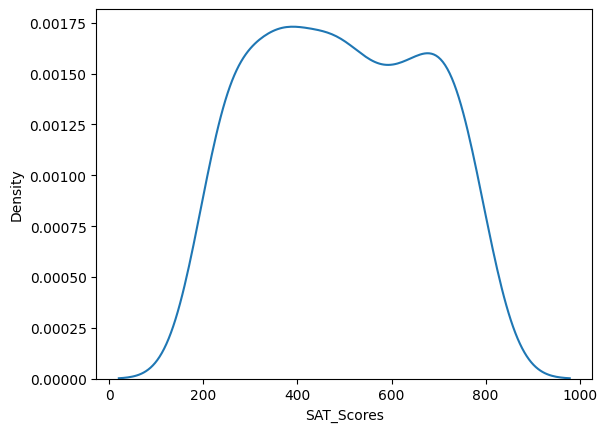

In [18]:
sns.kdeplot(df['SAT_Scores'])

<Axes: xlabel='GPA', ylabel='Density'>

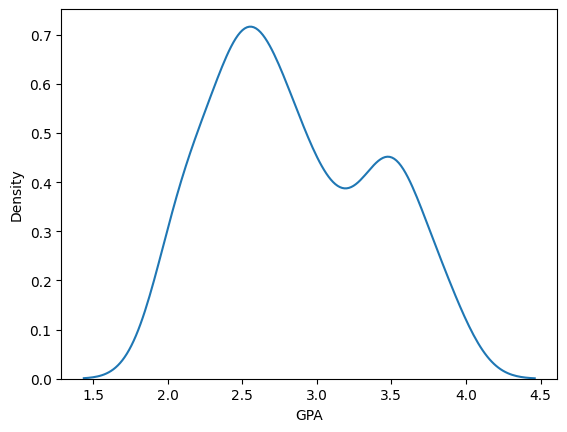

In [19]:
sns.kdeplot(df['GPA'])

<Axes: xlabel='SAT_Scores', ylabel='Density'>

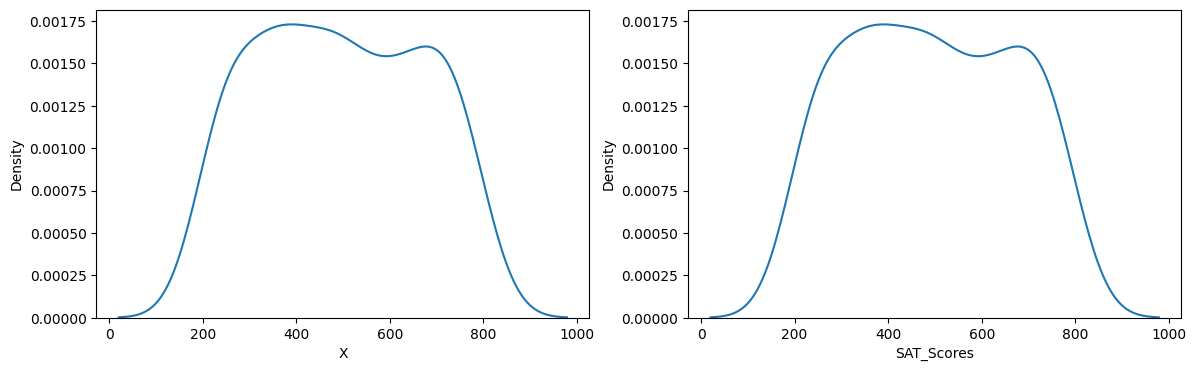

In [37]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(df['X'])

plt.subplot(122)
sns.kdeplot(df['SAT_Scores'])

<Axes: xlabel='GPA', ylabel='Density'>

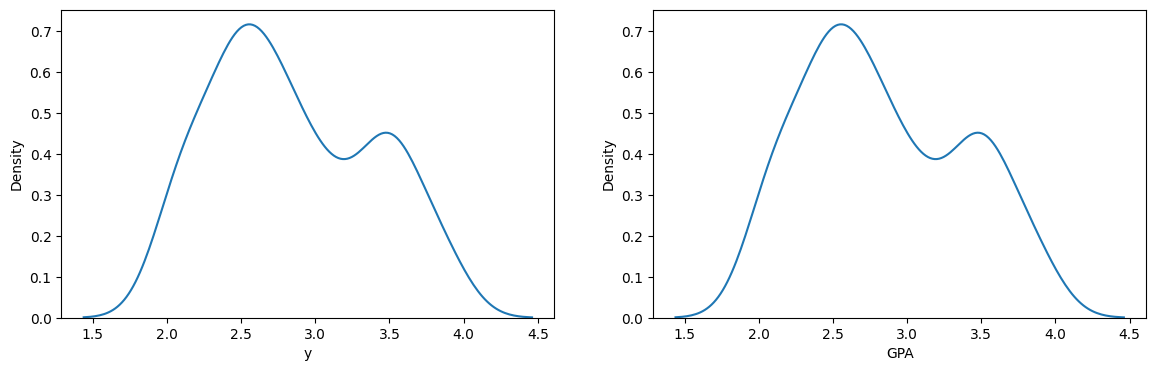

In [32]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.kdeplot(df['y'])

plt.subplot(1,2,2)
sns.kdeplot(df['GPA'])

<Axes: >

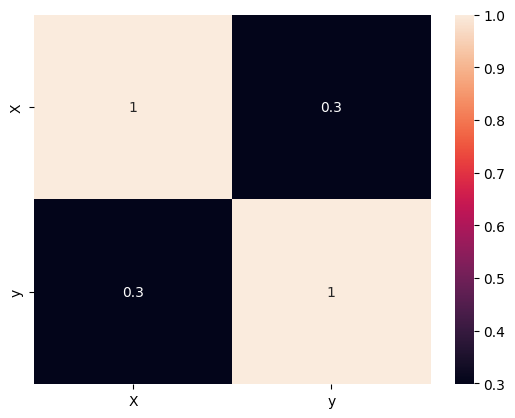

In [33]:
sns.heatmap(df.iloc[:,2:].corr(),annot=True)

<Axes: xlabel='X', ylabel='y'>

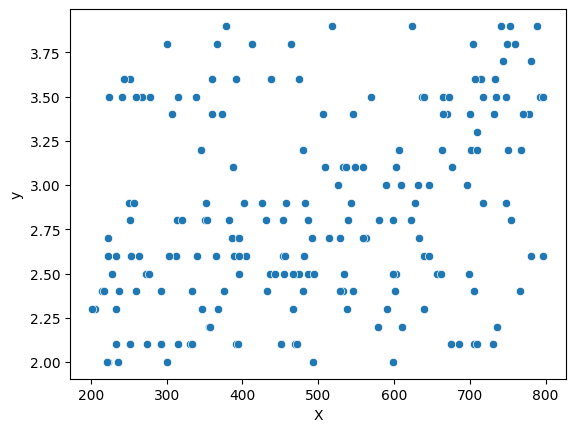

In [34]:
sns.scatterplot(df,x='X',y='y')

<Axes: xlabel='SAT_Scores', ylabel='GPA'>

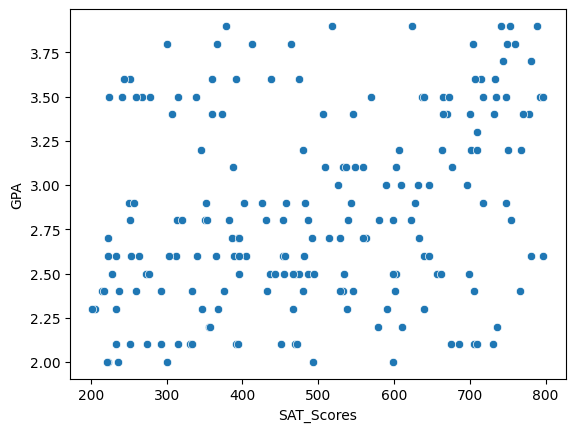

In [39]:
sns.scatterplot(df,x='SAT_Scores',y='GPA')

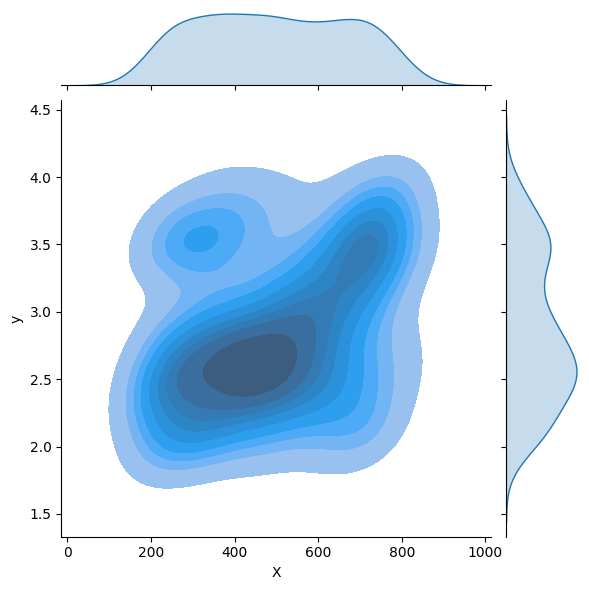

In [35]:
sns.jointplot(df,x='X',y='y',kind='kde',fill=True)

# 5.	Model Building:


In [33]:
from sklearn.metrics import r2_score,mean_squared_error 

In [48]:
X = df[["SAT_Scores"]]  # Ensure it's a DataFrame
y = df["GPA"]  # Target variable

# 🔹 Define column transformations (Scaling & Log Transform)
transformer = ColumnTransformer([
    ("scaler", MinMaxScaler(), ["SAT_Scores"])  # Scaling SAT scores
], remainder='passthrough')



In [49]:
from sklearn.model_selection import train_test_split 
# 🔹 Create a pipeline with transformations and regression model
pipeline = Pipeline([
    ("preprocessor", transformer),  # Preprocessing
    ("regressor", LinearRegression())  # Linear Regression Model
])

# 🔹 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, np.log(y), test_size=0.2, random_state=42)



In [51]:
pipeline = Pipeline([
    ("preprocessor", transformer),  # Preprocessing
    ("regressor", LinearRegression())  # Linear Regression Model
])

# 🔹 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, np.log(y), test_size=0.2, random_state=42)

# 🔹 Fit the pipeline
pipeline.fit(X_train, y_train) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  ['SAT_Scores'])])),
                ('regressor', LinearRegression())])

In [55]:
# 🔹 Make predictions
y_pred_log = pipeline.predict(X_test)  
y_pred = np.exp(y_pred_log)  # Convert back from log-scale

# 🔹 Model Evaluation
rmse = np.sqrt(mean_squared_error(np.exp(y_test), y_pred))
r2 = r2_score(np.exp(y_test), y_pred)

print(f" RMSE: {rmse:.4f}")
print(f" R 2Score: {r2:.4f}")

 RMSE: 0.5960
 R 2Score: -0.1546


<Axes: xlabel='SAT_Scores', ylabel='GPA'>

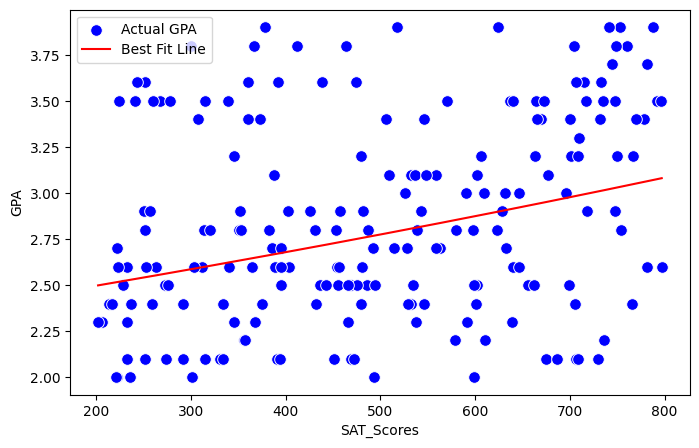

In [56]:
df["GPA_Predicted_Log"] = pipeline.predict(df[["SAT_Scores"]])
df["GPA_Predicted"] = np.exp(df["GPA_Predicted_Log"]) 
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["SAT_Scores"], y=df["GPA"], label="Actual GPA", color="blue", s=70)
sns.lineplot(x=df["SAT_Scores"], y=df["GPA_Predicted"], label="Best Fit Line", color="red")


In [ ]:
# 🔹 Apply transformations using pipeline
df["GPA_Predicted_Log"] = pipeline.predict(df[["SAT_Score"]])  # ✅ Use pipeline for predictions
df["GPA_Predicted"] = np.exp(df["GPA_Predicted_Log"])  # Convert back

<h2>Simple Linera regression

In [57]:
import statsmodels.formula.api as smf
model=smf.ols('y~X',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     19.16
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           1.96e-05
Time:                        21:36:01   Log-Likelihood:                -148.71
No. Observations:                 198   AIC:                             301.4
Df Residuals:                     196   BIC:                             308.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3919      0.110     21.699      0.0

In [58]:
y_pred1 =model.predict(df.X)

In [59]:
r2_score(df.y,y_pred1)

0.08903607347445486

In [60]:
mean_squared_error(df.y,y_pred1)

0.2629519541541379

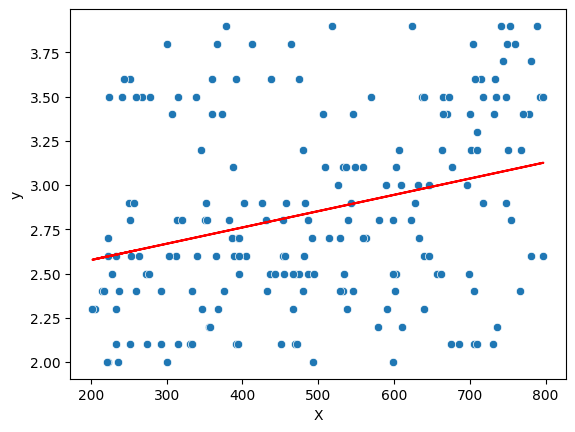

In [61]:
sns.scatterplot(df,x='X',y='y')
plt.plot(df.X,y_pred1,color='red')

# Conclusion After Applying Regression
